# Model from the Saranya paper

## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os

#NN
import keras
from keras import layers
from keras.models import Sequential

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.preprocessing import OneHotEncoder

2023-05-30 12:36:08.647987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Images preview

In [2]:
i = 3
img_1 = cv2.imread(f"seg_dataset_saranya2021/Green/g00{str(i)}.jpg")
img_2 = cv2.imread("seg_dataset_saranya2021/Overripen/v002.jpg")
print("image 1 shape (lines, columns, channels) = ", img_1.shape) 
print("image 2 shape (lines, columns, channels) = ", img_2.shape) 
print("\nimage type: ", type(img_1))

image 1 shape (lines, columns, channels) =  (536, 960, 3)
image 2 shape (lines, columns, channels) =  (540, 960, 3)

image type:  <class 'numpy.ndarray'>


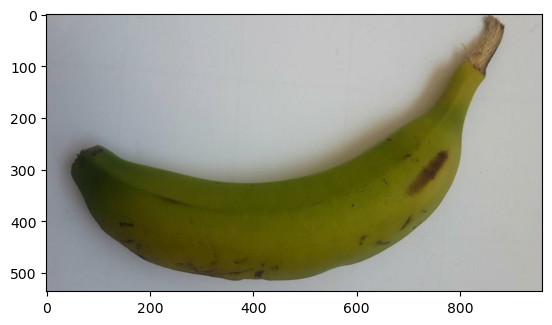

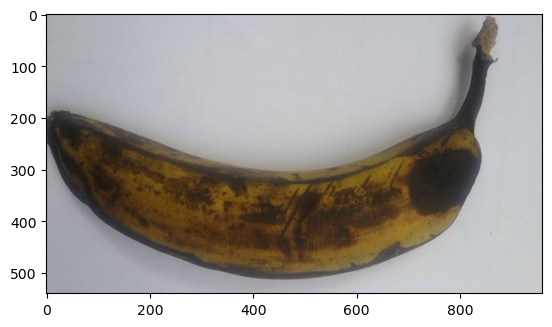

In [3]:
rgb_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB) # BGR to RGB 
rgb_img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB) # BGR to RGB 
plt.imshow(rgb_img_1)
#plt.axis('off')
plt.show()

plt.imshow(rgb_img_2)
#plt.axis('off')
plt.show()

## Data Pre-processing

### dataset Saranya

In [4]:
# paths to the image folders of each class
class1_path = "seg_dataset_saranya2021/Green"
class2_path = "seg_dataset_saranya2021/Midripen"
class3_path = "seg_dataset_saranya2021/Overripen"
class4_path = "seg_dataset_saranya2021/Yellowish_Green"

# Define empty lists to store the images and labels
images = []
labels = []

# Loop through each folder and extract the images
for class_path, class_label in [(class1_path, 0), (class2_path, 1), (class3_path, 2), (class4_path, 3)]:
    for image_file in os.listdir(class_path):
        # Load the image and convert to RGB format
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Add the image and label to the lists
        images.append(image)
        labels.append(class_label)

# Convert the images and labels to NumPy arrays
X = np.array(images)
y = np.array(labels)

In [5]:
X = X/255

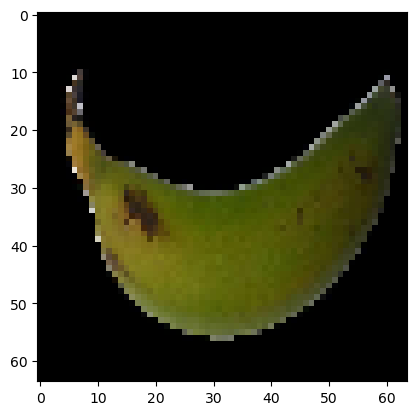

In [6]:
plt.imshow(X[0])
#plt.axis('off')
plt.show()

In [7]:
#from collections import Counter
#print(sorted(Counter(y).items()))

### One hot encoding of y

In [8]:
from keras.utils import to_categorical

# Convert labels to one-hot encoding
y_hot = to_categorical(y)

### Spliting the data

In [9]:
# split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, 
                                                    test_size=0.2, 
                                                    shuffle= True,
                                                    random_state=42)


### Balancing data with weights

In [10]:
# takes a vector with labels y, 
# returns the proper class weights 
# to be used in the fit function from keras
# to use in the training of the model
# prints the no. of classes

# returned variable to be used in training keras model

def get_weights(yy):
    y=yy
    # no. of elements per class
    unique_classes, class_counts = np.unique(y, return_counts=True, axis=0)
    print(f"unique_classes-->{unique_classes}")
    # Print the unique classes and their corresponding counts
    for cls, count in zip(unique_classes, class_counts):
        print(f"Class {cls}: {count} instances")

    total_instances = np.sum(class_counts)
    class_weights = total_instances / (class_counts * len(unique_classes))

    # Print the class weights
    for cls, weight in zip(unique_classes, class_weights):
        print(f"Class {cls} weight: {weight}")

    class_weights /= np.sum(class_weights)

    # Print the normalized class weights
    for cls, weight in zip(unique_classes, class_weights):
        print(f"Class {cls} weight (normalized): {weight}")


    w_dict = {}
    for i in range(len(unique_classes)):
        w_dict[i] = class_weights[i]
    
    return w_dict

In [11]:
w = get_weights(y_train)
w

unique_classes-->[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Class [0. 0. 0. 1.]: 37 instances
Class [0. 0. 1. 0.]: 28 instances
Class [0. 1. 0. 0.]: 70 instances
Class [1. 0. 0. 0.]: 81 instances
Class [0. 0. 0. 1.] weight: 1.4594594594594594
Class [0. 0. 1. 0.] weight: 1.9285714285714286
Class [0. 1. 0. 0.] weight: 0.7714285714285715
Class [1. 0. 0. 0.] weight: 0.6666666666666666
Class [0. 0. 0. 1.] weight (normalized): 0.3024080642150457
Class [0. 0. 1. 0.] weight (normalized): 0.39961065628416753
Class [0. 1. 0. 0.] weight (normalized): 0.159844262513667
Class [1. 0. 0. 0.] weight (normalized): 0.13813701698711964


{0: 0.3024080642150457,
 1: 0.39961065628416753,
 2: 0.159844262513667,
 3: 0.13813701698711964}

In [20]:
s = get_weights(y_test)

unique_classes-->[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
Class [0. 0. 0. 1.]: 11 instances
Class [0. 0. 1. 0.]: 5 instances
Class [0. 1. 0. 0.]: 17 instances
Class [1. 0. 0. 0.]: 22 instances
Class [0. 0. 0. 1.] weight: 1.25
Class [0. 0. 1. 0.] weight: 2.75
Class [0. 1. 0. 0.] weight: 0.8088235294117647
Class [1. 0. 0. 0.] weight: 0.625
Class [0. 0. 0. 1.] weight (normalized): 0.2300405953991881
Class [0. 0. 1. 0.] weight (normalized): 0.5060893098782138
Class [0. 1. 0. 0.] weight (normalized): 0.14884979702300408
Class [1. 0. 0. 0.] weight (normalized): 0.11502029769959406


## Data Augmentation

In [ ]:
def data_augmentation(X, y, num_augmented_samples):
    augmented_X = []
    augmented_y = []

    # Obtain the number of original samples
    num_samples = X.shape[0]

    # Calculate the number of augmented samples needed for each class
    unique_labels, label_counts = np.unique(y, return_counts=True)
    max_label_count = np.max(label_counts)
    num_augmented_per_class = (max_label_count - label_counts) // num_augmented_samples

    for i in range(num_samples):
        image = X[i]
        label = y[i]

        # Add the original sample
        augmented_X.append(image)
        augmented_y.append(label)

        # Convert image to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

        # Perform data augmentation
        for _ in range(num_augmented_samples):
            # Random rotation between -15 and 15 degrees
            angle = np.random.uniform(-15, 15)
            rotated_image = rotate_image(image, angle)
            augmented_X.append(rotated_image)
            augmented_y.append(label)

            # Random horizontal reflection
            if np.random.choice([True, False]):
                flipped_image = flip_image(rotated_image, flip_code=1)
                augmented_X.append(flipped_image)
                augmented_y.append(label)

            # Random vertical reflection
            if np.random.choice([True, False]):
                flipped_image = flip_image(rotated_image, flip_code=0)
                augmented_X.append(flipped_image)
                augmented_y.append(label)

            # Random translation between -10 and 10 pixels in both x and y directions
            tx = np.random.randint(-10, 10)
            ty = np.random.randint(-10, 10)
            translated_image = translate_image(rotated_image, tx, ty)
            augmented_X.append(translated_image)
            augmented_y.append(label)

            # Random brightness variation
            brightness_factor = np.random.uniform(0.7, 1.3)
            augmented_image = adjust_brightness(hsv_image, brightness_factor)
            augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_HSV2RGB)
            augmented_X.append(augmented_image)
            augmented_y.append(label)

        # Add additional augmented samples for balancing
        if num_augmented_per_class[label] > 0:
            for _ in range(num_augmented_per_class[label]):
                # Randomly select an augmentation type
                augmentation_type = np.random.choice(['rotate', 'flip', 'translate', 'brightness'])

                if augmentation_type == 'rotate':
                    angle = np.random.uniform(-15, 15)
                    rotated_image = rotate_image(image, angle)
                    augmented_X.append(rotated_image)
                    augmented_y.append(label)
                elif augmentation_type == 'flip':
                    flipped_image = flip_image(image, flip_code=1)
                    augmented_X.append(flipped_image)
                    augmented_y.append(label)
                elif augmentation_type == 'translate':
                    tx = np.random.randint(-10, 10)
                    ty = np.random.randint(-10, 10)
                    translated_image = translate_image(image, tx, ty)
                    augmented_X.append(translated_image)
                    augmented_y.append(label)
                elif augmentation_type == 'brightness':
                    brightness_factor = np.random.uniform(0.7, 1.3)
                    augmented_image = adjust_brightness(hsv_image, brightness_factor)
                    augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_HSV2RGB)
                    augmented_X.append(augmented_image)
                    augmented_y.append(label)

                num_augmented_per_class[label] -= 1

    return np.array(augmented_X), np.array(augmented_y)

def adjust_brightness(image, factor):
    image = image.astype(np.float32)
    image[:, :, 2] *= factor
    image[:, :, 2] = np.clip(image[:, :, 2], 0, 255)
    return image.astype(np.uint8)

# Rest of the code remains the same


def rotate_image(image, angle):
    height, width, _ = image.shape
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def flip_image(image, flip_code):
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

def translate_image(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_image

# Example usage
num_augmented_samples = 3
augmented_X, augmented_y = data_augmentation(X, y, num_augmented_samples)


## CNN

In [12]:
model = Sequential()

# layers.Conv2D(# of filters, filter dimension, ...)
# padding = 'valid' means no padding
model.add(layers.Conv2D(32, 3, activation = 'relu', padding="valid", input_shape = X[0].shape))
model.add(layers.Conv2D(16, 5, activation = 'relu', strides=(1,1), padding="valid"))
model.add(layers.Conv2D(16, 5, activation = 'relu', padding="valid"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, 3, activation = 'relu', padding="valid"))
model.add(layers.Conv2D(16, 5, activation = 'relu', padding="valid"))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(units = 16, activation = 'relu'))
model.add(layers.Dense(units = 4, activation = 'softmax'))

opt_1 = keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-05-30 12:36:19.417601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 16)        12816     
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 16)        6416      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 16)        2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 16)        6416      
                                                        

callbacks, only using one

In [14]:
cb_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

cb_plateau = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5,
    verbose=1,
    mode="auto",
    min_delta=0.001,
    cooldown=4,
    min_lr=1e-4,
)

In [15]:
bf = model.fit(X_train, y_train, validation_data=(X_test, y_test), class_weight = w,
               epochs=50, batch_size=8, callbacks=[cb_early, cb_plateau])

Epoch 1/50
27/27 [==============================] - 3s 104ms/step - loss: 0.3296 - accuracy: 0.3611 - val_loss: 1.3067 - val_accuracy: 0.3091 - lr: 0.0010
Epoch 2/50
27/27 [==============================] - 3s 96ms/step - loss: 0.2734 - accuracy: 0.5185 - val_loss: 1.1322 - val_accuracy: 0.6364 - lr: 0.0010
Epoch 3/50
27/27 [==============================] - 3s 97ms/step - loss: 0.1629 - accuracy: 0.6806 - val_loss: 0.6253 - val_accuracy: 0.7091 - lr: 0.0010
Epoch 4/50
27/27 [==============================] - 4s 145ms/step - loss: 0.1184 - accuracy: 0.7037 - val_loss: 0.9054 - val_accuracy: 0.6727 - lr: 0.0010
Epoch 5/50
27/27 [==============================] - 4s 156ms/step - loss: 0.1087 - accuracy: 0.7500 - val_loss: 0.6180 - val_accuracy: 0.7455 - lr: 0.0010
Epoch 6/50
27/27 [==============================] - 4s 149ms/step - loss: 0.0974 - accuracy: 0.7731 - val_loss: 0.5783 - val_accuracy: 0.7636 - lr: 0.0010
Epoch 7/50
27/27 [==============================] - 4s 143ms/step - loss

## Results

In [16]:
# best epoch obtained
results_test = model.evaluate(X_test, y_test)
print(results_test)

2/2 [==============================] - 0s 77ms/step - loss: 0.1808 - accuracy: 0.9455
[0.18075509369373322, 0.9454545378684998]


In [17]:
# summary of the model applied to the validation set
y_preds = model.predict(X_test)

y_max = np.max(y_preds, axis=1)
y_p = np.zeros(y_preds.shape)

for i in range(y_p.shape[0]):
    y_p[i, (np.where(y_preds[i]==np.max(y_preds[i])))] = 1

#print(y_p)

print(metrics.classification_report(y_test, y_p))

2/2 [==============================] - 0s 48ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.89      0.94      0.91        17
           2       1.00      0.80      0.89         5
           3       0.91      0.91      0.91        11

   micro avg       0.95      0.95      0.95        55
   macro avg       0.95      0.91      0.93        55
weighted avg       0.95      0.95      0.95        55
 samples avg       0.95      0.95      0.95        55



<function matplotlib.pyplot.show(close=None, block=None)>

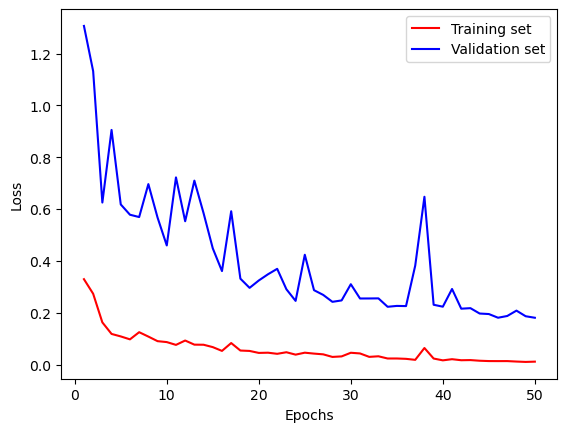

In [18]:
loss = bf.history['loss']
val_loss = bf.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training set')
plt.plot(epochs, val_loss, 'b', label = 'Validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

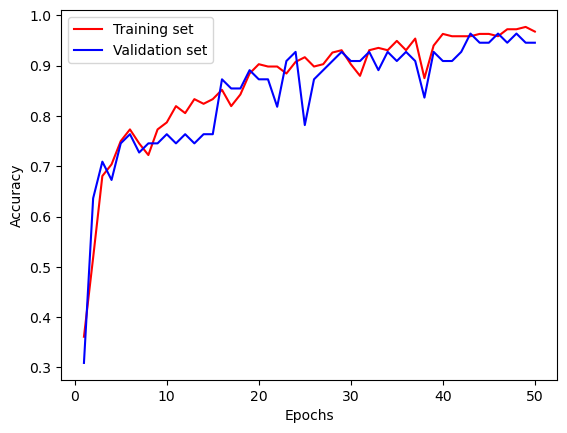

In [19]:
loss = bf.history['accuracy']
val_loss = bf.history['val_accuracy']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'r', label = 'Training set')
plt.plot(epochs, val_loss, 'b', label = 'Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [21]:
#model.save("n_gen.h5")